In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
cost = pd.read_csv('/Users/apple/Desktop/Python-Finance-QuantConnect/DATA/COST.csv', index_col='Date', parse_dates=True)['Adj Close']

In [8]:
WMT = pd.read_csv('/Users/apple/Desktop/Python-Finance-QuantConnect/DATA/WMT.csv', index_col='Date', parse_dates=True)['Adj Close']
TGT = pd.read_csv('/Users/apple/Desktop/Python-Finance-QuantConnect/DATA/TGT.csv', index_col='Date', parse_dates=True)['Adj Close']
DG = pd.read_csv('/Users/apple/Desktop/Python-Finance-QuantConnect/DATA/DG.csv', index_col='Date', parse_dates=True)['Adj Close']

<AxesSubplot:xlabel='Date'>

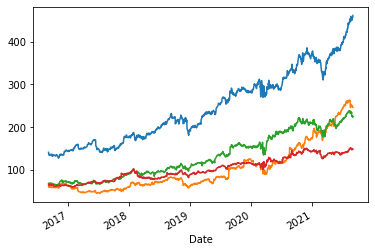

In [13]:
cost.plot()
TGT.plot()
DG.plot()
WMT.plot()

In [17]:
combined=pd.concat([cost, TGT, DG, WMT], axis=1)


In [23]:
combined.columns=['costco','Target','Dollar_General', 'Walmart']

In [24]:
combined

,costco,Target,Dollar_General,Walmart
Date,,,,
2016-09-06,140.896622,60.674061,68.342621,65.758080
2016-09-07,138.739395,60.847187,68.105331,64.911324
2016-09-08,136.805038,60.120117,67.080215,64.704163
2016-09-09,134.335831,59.721989,66.994766,63.325943
2016-09-12,135.218338,59.981625,68.366478,64.803238
...,...,...,...,...
2021-08-27,450.339996,249.179993,225.250000,146.520004
2021-08-30,455.929993,249.360001,225.360001,147.699997
2021-08-31,455.489990,246.979996,222.910004,148.100006


In [26]:
combined_returns=combined.pct_change(1).dropna()
combined_returns

,costco,Target,Dollar_General,Walmart
Date,,,,
2016-09-07,-0.015311,0.002853,-0.003472,-0.012877
2016-09-08,-0.013942,-0.011949,-0.015052,-0.003191
2016-09-09,-0.018049,-0.006622,-0.001274,-0.021300
2016-09-12,0.006569,0.004347,0.020475,0.023328
2016-09-13,-0.006263,-0.005195,-0.019368,-0.006672
...,...,...,...,...
2021-08-27,0.002292,0.000884,-0.002877,-0.005633
2021-08-30,0.012413,0.000722,0.000488,0.008053
2021-08-31,-0.000965,-0.009544,-0.010871,0.002708


<AxesSubplot:ylabel='Frequency'>

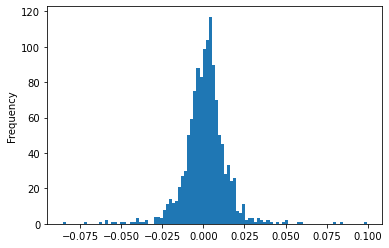

In [28]:
combined_returns['costco'].plot(kind='hist', bins=100)

<AxesSubplot:ylabel='Frequency'>

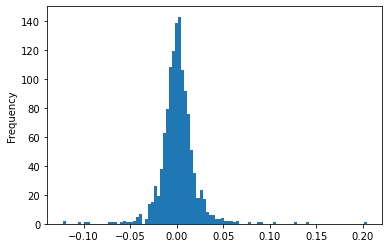

In [29]:
combined_returns['Target'].plot(kind='hist', bins=100)

<AxesSubplot:ylabel='Frequency'>

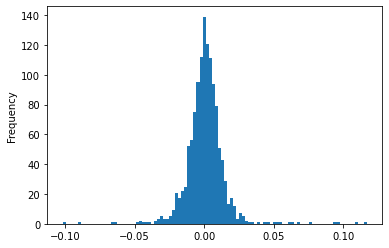

In [30]:
combined_returns['Walmart'].plot(kind='hist', bins=100)

<AxesSubplot:ylabel='Frequency'>

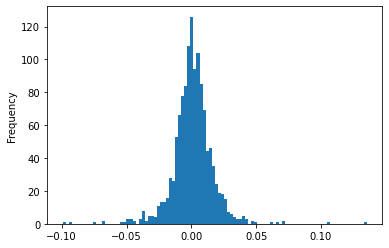

In [31]:
combined_returns['Dollar_General'].plot(kind='hist', bins=100)

<AxesSubplot:xlabel='Date'>

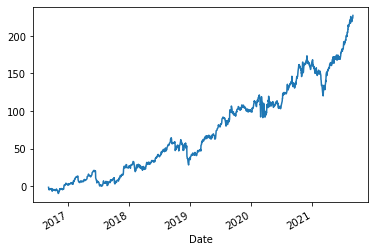

In [34]:
cum_returns=(1+ combined_returns['costco']).cumprod()-1
cumpct_returns=cum_returns*100
cumpct_returns.plot()

In [35]:
l= len( combined_returns.columns)
l

4

In [37]:
equalweightage=l *[1/l]
equalweightage

[0.25, 0.25, 0.25, 0.25]

In [39]:
equal_returns=np.dot(equalweightage, combined_returns.transpose())
equal_returns

array([-0.00720156, -0.01103371, -0.01181137, ..., -0.00466819,
       -0.00083906,  0.00573659])

In [41]:
portfolio_cum_returns= (1+equal_returns).cumprod()-1

In [44]:
pct_portfolio_cum_returns= portfolio_cum_returns*100

In [45]:
pct_portfolio_cum_returns

array([ -0.72015577,  -1.81558123,  -2.97527339, ..., 232.41137617,
       232.1324627 , 234.03777089])

In [46]:
cum_eq_ret=pd.Series(pct_portfolio_cum_returns, index=combined_returns.index)

In [47]:
cum_eq_ret

Date
2016-09-07     -0.720156
2016-09-08     -1.815581
2016-09-09     -2.975273
2016-09-12     -1.647971
2016-09-13     -2.569954
                 ...    
2021-08-27    232.170295
2021-08-30    233.970413
2021-08-31    232.411376
2021-09-01    232.132463
2021-09-02    234.037771
Length: 1257, dtype: float64

<AxesSubplot:xlabel='Date'>

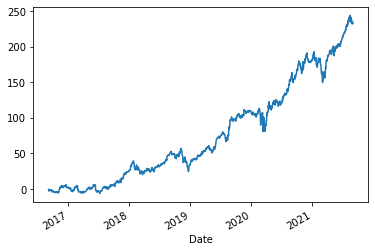

In [49]:
cum_eq_ret.plot(label='Equally Weighted Portfolio Returns')

<AxesSubplot:xlabel='Date'>

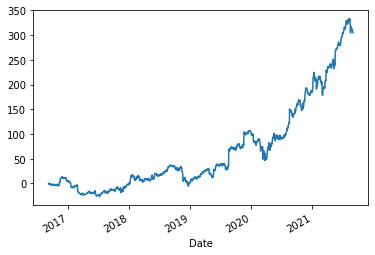

In [50]:
cum_returnsTGT=(1+ combined_returns['Target']).cumprod()-1
cumpct_returnsTGT=cum_returnsTGT*100
cumpct_returnsTGT.plot()

<AxesSubplot:xlabel='Date'>

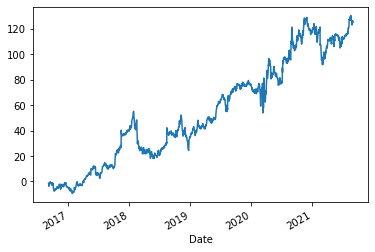

In [54]:
cum_returnsWMT=(1+ combined_returns['Walmart']).cumprod()-1
cumpct_returnsWMT=cum_returnsWMT*100
cumpct_returnsWMT.plot()

<AxesSubplot:xlabel='Date'>

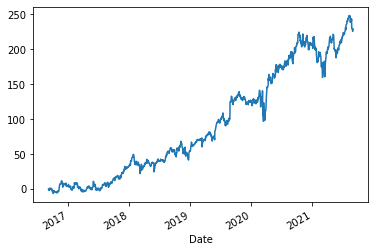

In [55]:
cum_returnsDG=(1+ combined_returns['Dollar_General']).cumprod()-1
cumpct_returnsDG=cum_returnsDG*100
cumpct_returnsDG.plot()

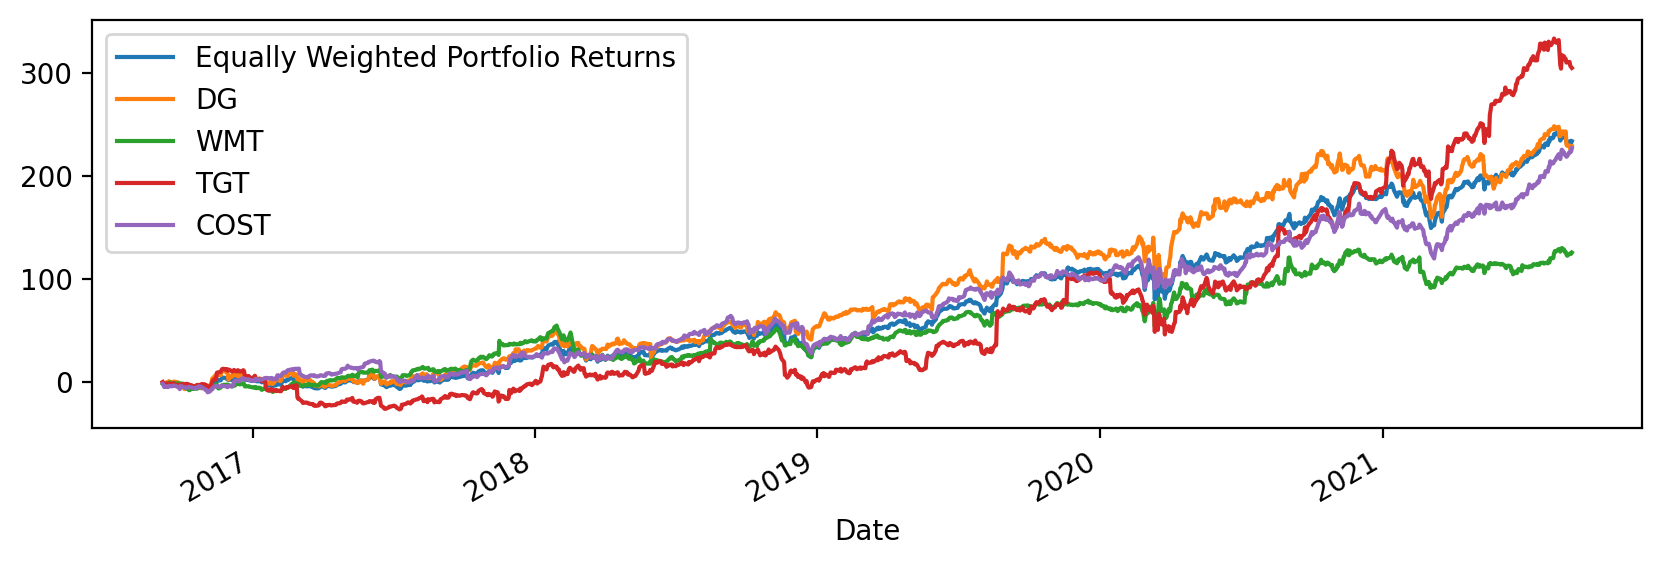

In [56]:
plt.figure(figsize=(10,3), dpi=200)
cum_eq_ret.plot(label='Equally Weighted Portfolio Returns')
cumpct_returnsDG.plot(label='DG')
cumpct_returnsWMT.plot(label='WMT')
cumpct_returnsTGT.plot(label='TGT')
cumpct_returns.plot(label='COST')
plt.legend()
